In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.legend_handler import HandlerTuple
import matplotlib.gridspec as gridspec
%matplotlib inline

#import pandas as pd
#import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# results folder absolute path
path = "E:\LAB/experiment/6. Decentralized FD/decentralized-FD/code/results/collected_results/"

# colors array for graphs
colors = ["blue", "red", "green", "magenta", "orange", "firebrick", "chocolate", "black", "olive", "yellow", 
          "green", "brown", "lime", "cyan"]

# symbols used for ploting
symbols = ["x", "v", "^", "<", ">", "1", "2", "3", "4", "8", "s", "p", "P", "*", "h", 
           "H", "X", "D", "d", "|", "_", "+"]

# A. Heatmap Experiments -- Version 1 (With Alphas)

###### Confidence = 0% , 50% ........ alpha = 0.1, 1.0, 100.0

In [3]:
#rcParams['axes.titlepad'] = '10'
#rcParams['axes.labelpad'] = '10'

font = {'family' : 'DejaVu Sans',
#        'weight' : 'bold',
        'size'   : 17}
matplotlib.rc('font', **font)

In [4]:
r0 = []
# Confidence = 0.0 , Alpha = 0.1
for i in range(64):
    r0.append(np.load(path + "exp_hmap/conf00_alpha01/xp_{}.npz".format(i), allow_pickle=True))

# Confidence = 0.0 , Alpha = 1.0
for i in range(64):
    r0.append(np.load(path + "exp_hmap/conf00_alpha1/xp_{}.npz".format(i), allow_pickle=True))

# Confidence = 0.0 , Alpha = 100
for i in range(64):
    r0.append(np.load(path + "exp_hmap/conf00_alpha100/xp_{}.npz".format(i), allow_pickle=True))

# Confidence = 0.5 , Alpha = 0.1
for i in range(64):
    r0.append(np.load(path + "exp_hmap/conf05_alpha01/xp_{}.npz".format(i), allow_pickle=True))

# Confidence = 0.5 , Alpha = 1.0
for i in range(64):
    r0.append(np.load(path + "exp_hmap/conf05_alpha1/xp_{}.npz".format(i), allow_pickle=True))

# Confidence = 0.5 , Alpha = 100
for i in range(64):
    r0.append(np.load(path + "exp_hmap/conf05_alpha100/xp_{}.npz".format(i), allow_pickle=True))


In [5]:
#*****************************************************************************#
#                                                                             #
#   description:                                                              #
#   helper functions to create heatmap according to given parameters.         #
#                                                                             #
#*****************************************************************************#
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", xtick_use=False, cbar_use=False, **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()
    
    # Plot the heatmap
    im = ax.imshow(data, aspect="auto", **kwargs)
    
    # Create colorbar
    cbar = None
    if cbar_use:
        cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
        cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
    
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    
    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=False, bottom=True,
                    labeltop=False, labelbottom=True)
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right", rotation_mode="anchor")
    
    # Turn spines off and create white grid.
    #ax.spines.set_visible(False)
    
    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
    
    if not xtick_use:
        ax.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
        
    return im, cbar


#*****************************************************************************#
#                                                                             #
#   description:                                                              #
#   helper functions to add annotations to the already created heatmap.       #
#                                                                             #
#*****************************************************************************#
def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                      textcolors=("black", "white"),
                      threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

def create_heatmap(f, a, experiments, alphas=[0.1, 1.0, 100]):
    xlabels = np.array([100, 200, 400, 800, 1600, 3200, 6400, 12800])
    ylabels = np.array([100, 200, 400, 800, 1600, 3200, 6400, 12800])
    
    local2i = {s : i for i, s in enumerate(sorted(xlabels))}
    distill2j = {s : j for j, s in enumerate(sorted(ylabels))}

    for n, alpha in enumerate(alphas):
        # create data collection matrices
        mat1 = np.zeros([8,8])
        mat2 = np.zeros([8,8])

        # prepare data for the graph
        for exp in experiments[n]:
            r = exp
            hp = dict(exp["hyperparameters"][np.newaxis][0])

            i = local2i[int(hp["total_data"]/10)]
            j = distill2j[hp["n_distill"]]

            #n_distill = exp.hyperparameters["n_distill"]
            #epochs = exp.hyperparameters["local_epochs"]
            mat1[i,j] = np.mean([r["worker_{}_accuracy".format(i)] for i in range(10)])
            mat2[i,j] = np.mean([r["tr_accuracy_0_worker_{}".format(i)] for i in range(10)])
    
        # plot the right graph
        #im = ax[1].imshow(mat1)
        im, cbar = heatmap(mat1, ylabels, xlabels, ax=ax[1], xtick_use=True, cbar_use=True, cmap="YlGn", cbarlabel="")
        annotate_heatmap(im, valfmt="{x:.2f}")
        
        # set titles / labels
        ax[1].set_title(r"Post-distill, $\alpha=$"+str(alpha))
        ax[1].set_xlabel(r"Distill data $X^{pub}$")
        #ax[1].set_ylabel(r"Local Training Data $X^{priv}$")
        
        # plot left graph
        #im = ax[0].imshow(mat2)
        im, cbar = heatmap(mat2[:,:1], ylabels, [""], ax=ax[0], cmap="YlGn", cbarlabel="")
        annotate_heatmap(im, valfmt="{x:.2f}")
        # set labels / titles
        ax[0].set_title(r"Pre-distill, $\alpha=$"+str(alpha))#ing
        ax[0].set_ylabel(r"Local training data $X^{priv}$")
    
    fig.tight_layout()

In [6]:
def make_double_stochstic(x):
    rsum = None
    csum = None

    n = 0 
    while n < 1000 and (np.any(rsum != 1) or np.any(csum != 1)):
        x /= x.sum(0)
        x = x / x.sum(1)[:, np.newaxis]
        rsum = x.sum(1)
        csum = x.sum(0)
        n += 1

    #x = x / x.sum(axis=0).reshape(1,-1)
    return x


def make_alpha_graph(fig, ax, alpha):
    #plt.figure(figsize=(15,5))

    n_clients=10
    n_classes=10

    label_distribution = np.random.dirichlet([alpha]*n_clients, n_classes)
    label_distribution = make_double_stochstic(label_distribution)

    for i in range(10):
        for j in range(10):
            ax.scatter(j,i,s=label_distribution[i,j]*5000, color="green", zorder=5, ec="k") #"C0"

    ax.set_title(r"$\alpha={}$".format(alpha))
    ax.set_xticks(range(10))
    ax.set_xticklabels(range(1,11))
    #ax.set_xticks(range(10), range(1,11))
    ax.set_yticks(range(10))
    ax.set_xlabel("Workers")
    ax.set_ylabel("Labels")
    ax.grid("bot", zorder=4)
    #ax.grid("minor", zorder=4)
    ax.set_xlim(-1, 10)
    ax.set_ylim(-1, 10)

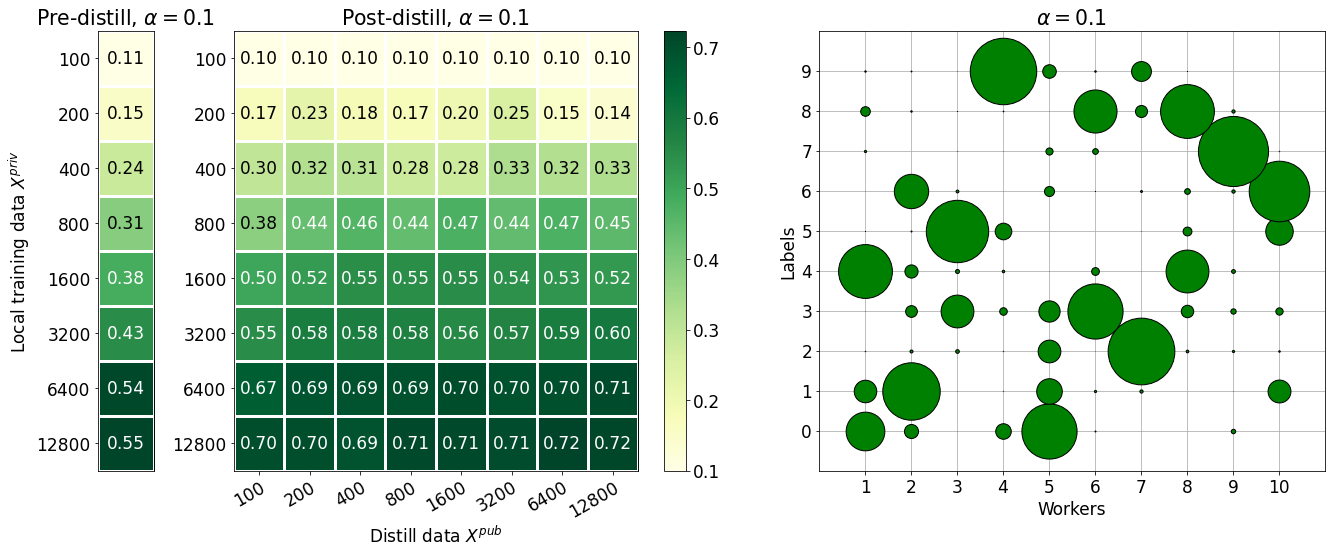

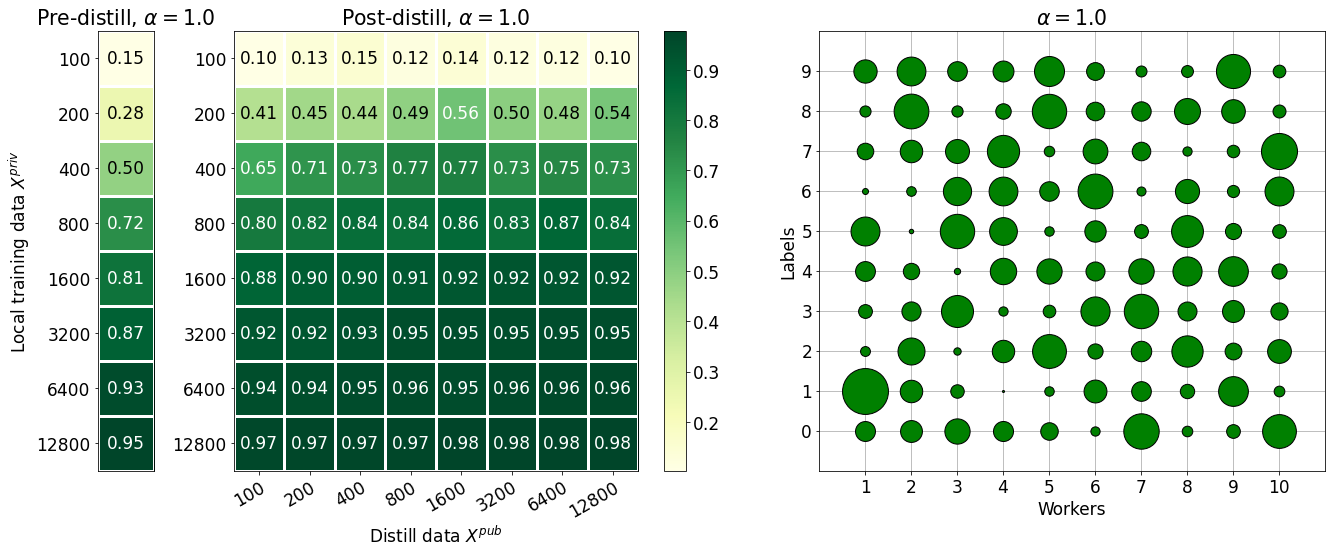

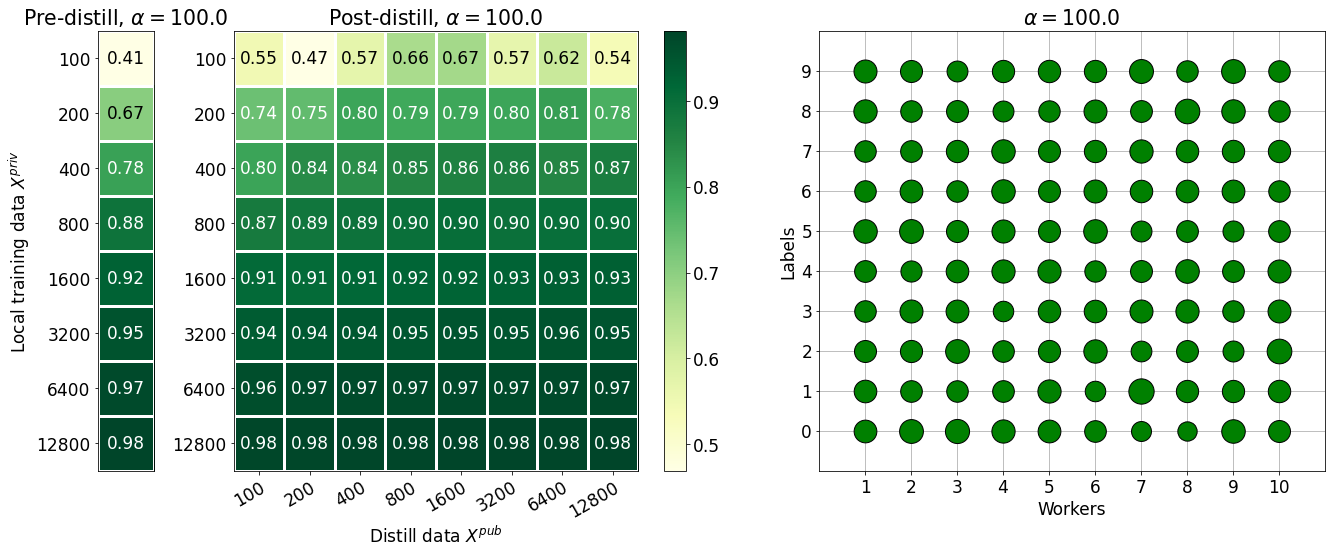

In [7]:
fig, ax = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1, 9, 9]}, figsize=(19,8))
fig.subplots_adjust(wspace=0.15, bottom=0.23)
create_heatmap(fig, ax, [r0[0:64]], alphas=[0.1])
make_alpha_graph(fig, ax[2], alpha=0.1)
plt.savefig("exp-heatmap-1.png")

fig, ax = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1, 9, 9]}, figsize=(19,8))
fig.subplots_adjust(wspace=0.15, bottom=0.23)
create_heatmap(fig, ax, [r0[64:128]], alphas=[1.0])
make_alpha_graph(fig, ax[2], alpha=1.0)
plt.savefig("exp-heatmap-2.png")

fig, ax = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1, 9, 9]}, figsize=(19,8))
fig.subplots_adjust(wspace=0.15, bottom=0.23)
create_heatmap(fig, ax, [r0[128:192]], alphas=[100.0])
make_alpha_graph(fig, ax[2], alpha=100.0)
plt.savefig("exp-heatmap-3.png")


# A. Heatmap Experiments -- Version 2 (All in one Row)

###### Confidence = 0% , 50% ........ alpha = 0.1, 1.0, 100.0

In [8]:
#rcParams['axes.titlepad'] = '10'
#rcParams['axes.labelpad'] = '10'

font = {'family' : 'DejaVu Sans',
#        'weight' : 'bold',
        'size'   : 25}
matplotlib.rc('font', **font)

In [9]:
r0 = []
# Confidence = 0.0 , Alpha = 0.1
for i in range(64):
    r0.append(np.load(path + "exp_hmap/conf00_alpha01/xp_{}.npz".format(i), allow_pickle=True))

# Confidence = 0.0 , Alpha = 1.0
for i in range(64):
    r0.append(np.load(path + "exp_hmap/conf00_alpha1/xp_{}.npz".format(i), allow_pickle=True))

# Confidence = 0.0 , Alpha = 100
for i in range(64):
    r0.append(np.load(path + "exp_hmap/conf00_alpha100/xp_{}.npz".format(i), allow_pickle=True))

# Confidence = 0.5 , Alpha = 0.1
for i in range(64):
    r0.append(np.load(path + "exp_hmap/conf05_alpha01/xp_{}.npz".format(i), allow_pickle=True))

# Confidence = 0.5 , Alpha = 1.0
for i in range(64):
    r0.append(np.load(path + "exp_hmap/conf05_alpha1/xp_{}.npz".format(i), allow_pickle=True))

# Confidence = 0.5 , Alpha = 100
for i in range(64):
    r0.append(np.load(path + "exp_hmap/conf05_alpha100/xp_{}.npz".format(i), allow_pickle=True))


In [10]:
#*****************************************************************************#
#                                                                             #
#   description:                                                              #
#   helper functions to create heatmap according to given parameters.         #
#                                                                             #
#*****************************************************************************#
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", ytick_use=False, cbar_use=False, **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()
    
    # Plot the heatmap
    im = ax.imshow(data, aspect="auto", vmin=0.1, vmax=0.99, **kwargs)
    
    # Create colorbar
    cbar = None
    #if cbar_use:
    #    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    #    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
    
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    
    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=False, bottom=True,
                    labeltop=False, labelbottom=True)
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right", rotation_mode="anchor")
    plt.setp(ax.get_yticklabels(), rotation=30, ha="right", rotation_mode="anchor")
    
    # Turn spines off and create white grid.
    #ax.spines.set_visible(False)
    
    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
    
    if not ytick_use:
        ax.tick_params(axis="y", which="both", left=False, right=False, labelleft=False)
        
    return im, cbar


#*****************************************************************************#
#                                                                             #
#   description:                                                              #
#   helper functions to add annotations to the already created heatmap.       #
#                                                                             #
#*****************************************************************************#
def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                      textcolors=("black", "white"),
                      threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

def create_heatmap(f, a, experiments, alphas=[0.1, 1.0, 100]):
    xlabels = np.array([100, 200, 400, 800, 1600, 3200, 6400, 12800])
    ylabels = np.flip(np.array([100, 200, 400, 800, 1600, 3200, 6400, 12800]))
    
    local2i = {s : i for i, s in enumerate(sorted(xlabels))}
    distill2j = {s : j for j, s in enumerate(sorted(ylabels))}
    ylabel_use = True
    
    for n, alpha in enumerate(alphas):
        # create data collection matrices
        mat1 = np.zeros([8,8])
        mat2 = np.zeros([8,8])

        # prepare data for the graph
        for exp in experiments[n]:
            r = exp
            hp = dict(exp["hyperparameters"][np.newaxis][0])

            i = local2i[int(hp["total_data"]/10)]
            j = distill2j[hp["n_distill"]]

            #n_distill = exp.hyperparameters["n_distill"]
            #epochs = exp.hyperparameters["local_epochs"]
            mat1[i,j] = np.mean([r["worker_{}_accuracy".format(i)] for i in range(10)])
            mat2[i,j] = np.mean([r["tr_accuracy_0_worker_{}".format(i)] for i in range(10)])
    
        # plot the right graph
        #im = ax[1].imshow(mat1)
        im, cbar = heatmap(np.flip(mat1.T, axis=0), ylabels, xlabels, ax=ax[0, n], ytick_use=True, cbar_use=True, cmap="YlGn", cbarlabel="")
        annotate_heatmap(im, valfmt="{x:.2f}")
        
        # set titles / labels
        ax[0, n].set_title(r"Post-distill, $\alpha=$"+str(alpha))
        if ylabel_use:
            ax[0, n].set_ylabel(r"Distill data $X^{pub}$")
            ylabel_use = False
        
        # plot bottom graph
        #im = ax[0].imshow(mat2)
        im, cbar = heatmap(mat2[:,:1].T, [""], xlabels, ax=ax[1, n], cmap="YlGn", cbarlabel="")
        annotate_heatmap(im, valfmt="{x:.2f}")
        # set labels / titles
        ax[1, n].set_title(r"Pre-distill, $\alpha=$"+str(alpha))#ing
        ax[1, n].set_xlabel(r"Local training data $X^{priv}$")
    
    # create a common cbar
    #f.subplots_adjust(right=0.8)
    cbar_ax = f.add_axes([0.96, 0.18, 0.02, 0.75])
    f.colorbar(im, cax=cbar_ax)
    f.tight_layout()

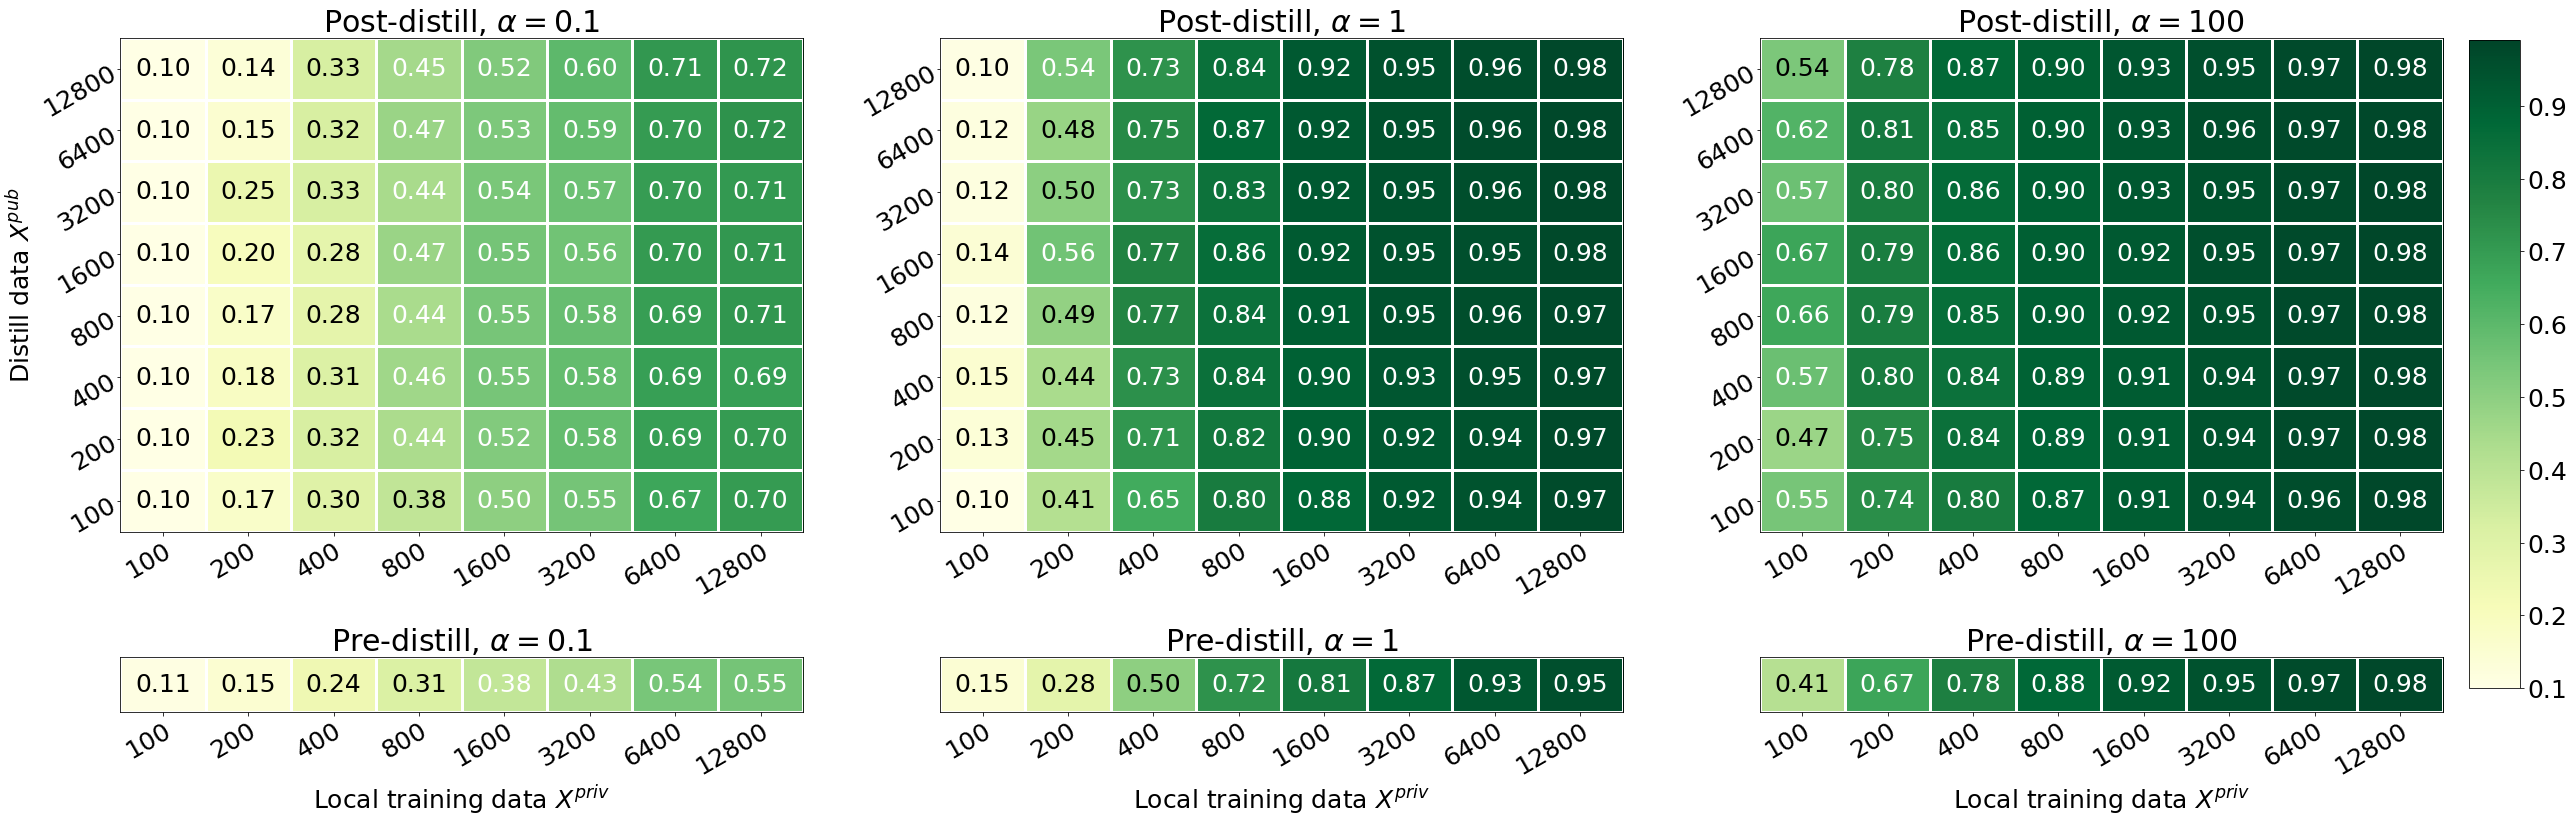

In [11]:
fig, ax = plt.subplots(2, 3, gridspec_kw={'height_ratios': [9, 1], 'width_ratios': [1, 1, 1] }, figsize=(36,12))
create_heatmap(fig, ax, [r0[0:64], r0[64:128], r0[128:192]], alphas=[0.1, 1, 100])
fig.subplots_adjust(wspace=0.2, right=0.95)
plt.savefig("exp-heatmap.png", dpi=96)

# B. # of Samples vs. Reward Graph

In [12]:
rcParams['axes.titlepad'] = '10'
rcParams['axes.labelpad'] = '10'

font = {'family' : 'DejaVu Sans',
#        'weight' : 'bold',
        'size'   : 16}
matplotlib.rc('font', **font)

In [13]:
r1 = []
# heterogeneous group
r1.append(np.load(path + "exp_acc_reward/xp_30.npz", allow_pickle=True))
r1.append(np.load(path + "exp_acc_reward/xp_31.npz", allow_pickle=True))
r1.append(np.load(path + "exp_acc_reward/xp_32.npz", allow_pickle=True))

# npz files for samples vs reward graph
r2 = []
r2.append(np.load(path + "exp_samples/xp_0.npz", allow_pickle=True)) # beta = 1
r2.append(np.load(path + "exp_samples/xp_1.npz", allow_pickle=True)) # beta = 3
r2.append(np.load(path + "exp_samples/xp_2.npz", allow_pickle=True)) # beta = 5

In [14]:
def create_graph_accuracy_vs_reward_heter(fig, ax, results, tag=""):
    # Experiment legends
    exp_legends = [r"$\beta = 1$", r"$\beta = 3$", r"$\beta = 5$"]
    # prepare data for the graph
    # go trough all experiments and plot them
    for i, rs in enumerate(results):
        xAxis = [rs["tr_accuracy_0_worker_{}".format(i)][0] * 100.0 
                 for i in range(10)]
        yAxis = np.transpose(np.array(rs["reward_0"])).reshape(-1).tolist()
        # plot actual graph
        ax.plot(xAxis, yAxis, symbols[i], color=colors[i], label=exp_legends[i])

    # create infomatics of the graph
    ax.set_title(r"$|X^{priv}| \approx 24K$, $|X^{pub}| = 40K$")
    ax.set_xlabel("Local Training Accuracy")
    ax.set_ylabel("Reward")
    # create legend
    ax.legend()

In [15]:
def create_graph_datasize_vs_reward(fig, ax, results, tag=""):
    # creating the # of samples vs reward graph
    #fig, ax = plt.subplots(figsize=(9,4))
    #ax.xaxis.grid(True, which="major")
    #ax.yaxis.grid(True, which="major")

    graph_labels = [r"$\beta = 1$", r"$\beta = 3$", r"$\beta = 5$"]
    xlabels = [50, 100, 200, 400, 800, 1600, 3200, 6400]
    
    # create xticks to display on graph
    xticks = [i+1 for i in range(8)]
    
    # prepare data for the graph
    for i, exp in enumerate(results):
        yAxis = np.transpose(np.array(exp["reward_0"])).reshape(-1)
        # plot actual graph        
        ax.plot(xticks, yAxis, "x", color=colors[i])
        ax.plot(xticks, yAxis, color=colors[i], label=graph_labels[i])

    # create infomatics of the graph
    ax.set_title(r"$|X^{pub}| = 40K$")
    ax.set_xlabel(r"Local Dataset Size $|X^{priv}|$")
    ax.set_ylabel("Reward")
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels)
    # create legend
    ax.legend()

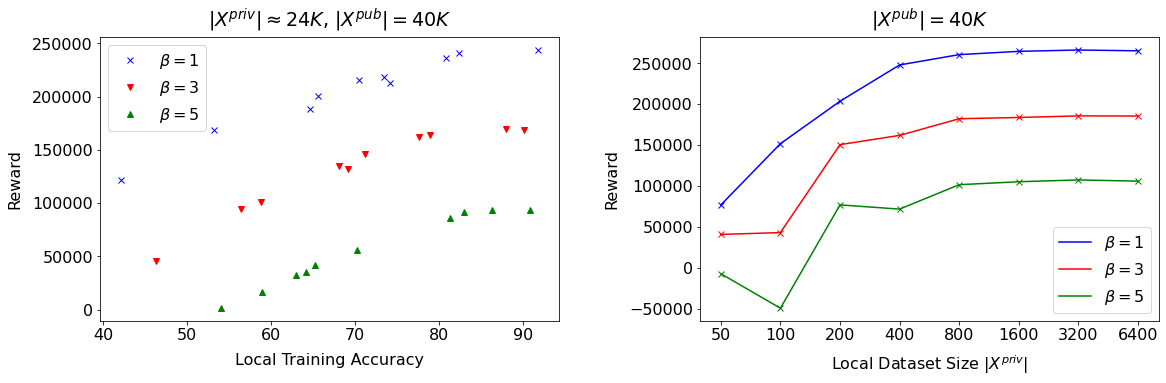

In [16]:
# prepare data for the graph
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize=(18,7))
fig.tight_layout(pad=6.0)

# plot accuracy vs reward
create_graph_accuracy_vs_reward_heter(fig, ax[0], r1)

# plot data size vs reward
create_graph_datasize_vs_reward(fig, ax[1], r2)

# save the plot
plt.savefig("exp-ac-rew_sam-rew.png")

# C. Prediction Confidence vs. Reward Graph

In [17]:
# npz files for samples vs reward graph
r3 = []
for i in range(30):
    r3.append(np.load(path + "exp_confid/xp_{}.npz".format(i), allow_pickle=True))

In [18]:
def create_graph_confid_vs_reward(results, tag=""):
    # Experiment legends
    exp_legends = ["Always Predict",
                   "Confidence: 30%", 
                   "Confidence: 50%", 
                   "Confidence: 70%", 
                   "Confidence: 90%"]
    # labels
    x_labels = ["0.5", "1", "2", "3", "4", "5"]#, "6", "7", "8", "9"]
    
    # prepare data for the graph
    fig, ax = plt.subplots(figsize=(18, 8))

    # go trough all experiments and collect results
    xAxis = np.array([0, 2, 4, 6, 8, 10]) #, 12, 14, 16, 18])
    yAxis = []
    for i, rs in enumerate(results):
        
        yAxis += [np.mean(np.transpose(np.array(rs["reward_0"])).reshape(-1))] #np.mean() #[np.transpose(np.array(rs["reward_0"])).reshape(-1)[0]] #np.mean()

    # reshape yAxis
    yAxis = np.array(yAxis).reshape((6, 5)).T
    bar_position = -0.50
    for i, data in enumerate(yAxis):
        plt.bar(xAxis+bar_position, data, color=colors[i], width = 0.25, label=exp_legends[i])
        bar_position += 0.25

    # create infomatics of the graph
    ax.set_title(r"LeNet on EMNIST, $\alpha = 0.1$, $|X^{priv}| \approx 24K$, $|X^{pub}| = 40K$, $Epochs = 10$")
    ax.set_xlabel(r"Penalty $\beta$")
    ax.set_ylabel("Average Reward")
    
    # clear exisiting ticks
    plt.xticks(xAxis, x_labels)
    
    # set spines and other lables
    plt.axhline(0, color="black", linewidth=1)
    #ax.spines["bottom"].set_position(("data", 0))
    
    # create legend
    plt.legend()

    # save the figure
    plt.tight_layout()

    plt.savefig("exp-confid_vs_reward.png")

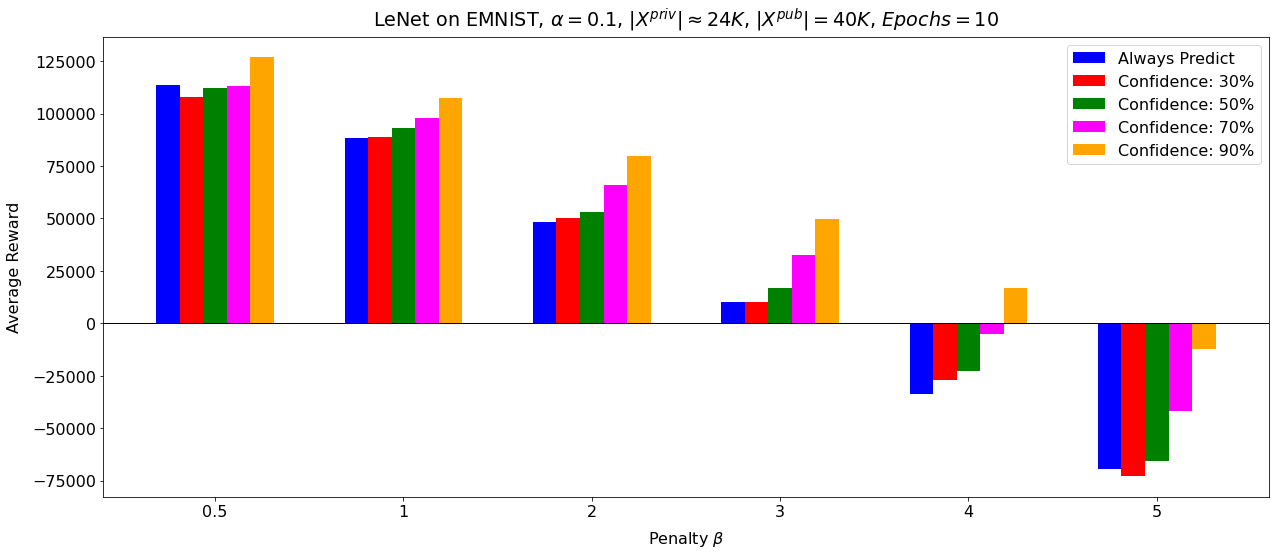

In [19]:
create_graph_confid_vs_reward(r3, tag="")

# D. Accuracy vs. Reward Graph

In [20]:
# change font size
font = {'family' : 'DejaVu Sans',
        'size'   : 44}
matplotlib.rc('font', **font)
rcParams['axes.titlepad'] = '20'
rcParams['axes.labelpad'] = '10'
rcParams['legend.borderpad'] = '0.5'
rcParams['xtick.major.pad']='8'
rcParams['ytick.major.pad']='8'

In [21]:
# npz files for samples vs reward graph
r4 = []
for i in range(24):
    r4.append(np.load(path + "exp_acc_reward/xp_{}.npz".format(i), allow_pickle=True))


In [22]:
def create_graph_accuracy_vs_reward(fig, ax, results, tag=""):
    l1, l2 = [] , []
    # go trough all experiments and plot them
    for i, rs in enumerate(results):
        xAxis = [rs["tr_accuracy_0_worker_{}".format(i)][0] * 100.0 
                 for i in range(10)]
        yAxis = np.transpose(np.array(rs["reward_0"])).reshape(-1).tolist()
        # plot actual graph
        a1, = ax.plot(xAxis[0], yAxis[0], "o", markersize=20, color=colors[i])
        a2, = ax.plot(xAxis[1:], yAxis[1:], symbols[i], markersize=20, color=colors[i])
        l1.append(a1)
        l2.append(a2)

    # create infomatics of the graph
    #ax.set_title(r"LeNet on EMNIST, $\beta = {}$".format(tag[-1])+r", $|X^{priv}| \approx 24K$, $|X^{pub}| = 40K$, $Epochs = 10$")
    ax.set_title(r"$\beta = {}$".format(tag[-1]))
    ax.set_xlabel("Local Training Accuracy")
    ax.set_ylabel("Reward")
    return l1, l2

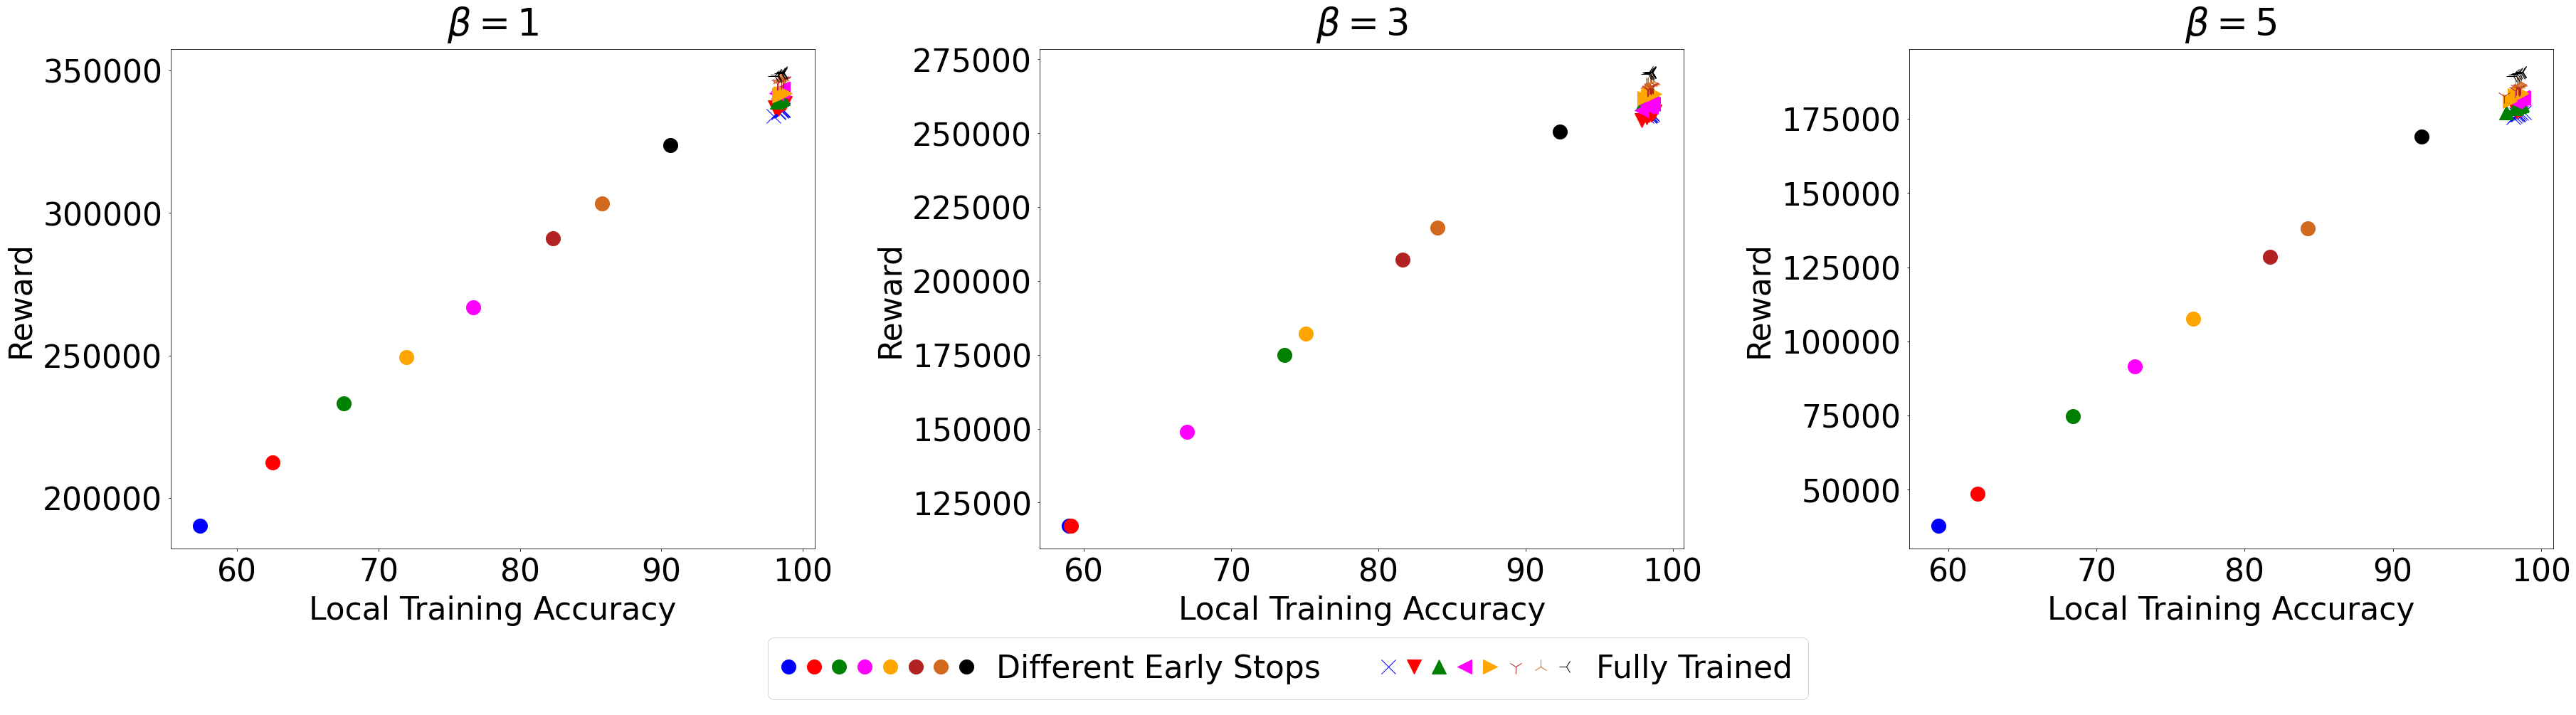

In [23]:
# prepare the graph
fig, ax = plt.subplots(nrows=1, ncols= 3, figsize=(60, 15))
fig.subplots_adjust(wspace=0.35, bottom=0.23)
#fig.tight_layout(pad=6.0)

# plot all graphs
l1, l2 = create_graph_accuracy_vs_reward(fig, ax[0], r4[0:8], tag="alpha_100_beta_1")
l1, l2 = create_graph_accuracy_vs_reward(fig, ax[1], r4[8:16], tag="alpha_100_beta_3")
l1, l2 = create_graph_accuracy_vs_reward(fig, ax[2], r4[16:24], tag="alpha_100_beta_5")

# create legends
exp_legends = ["Different Early Stops", "Fully Trained"]
fig.legend([tuple(l1), tuple(l2)], 
           exp_legends, 
           markerscale=1.0, 
           handlelength=6, 
           ncol=2, 
           loc='lower center', 
           handler_map={tuple: HandlerTuple(ndivide=None)}
          )

# save the graph
plt.savefig("exp-accuracy_vs_reward.png")

# E. Average Reward on Collusion vs Honest Participation

In [24]:
# change font size
font = {'family' : 'DejaVu Sans',
        'size'   : 38}
matplotlib.rc('font', **font)
rcParams['axes.titlepad'] = '20'
rcParams['axes.labelpad'] = '10'
rcParams['legend.borderpad'] = '0.5'
rcParams['xtick.major.pad']='8'
rcParams['ytick.major.pad']='8'

In [25]:
# npz files for collusion graph
r5 = []
for i in range(30):
    r5.append(np.load(path + "exp_collude/xp_{}.npz".format(i), allow_pickle=True))

In [26]:
def plot_collusion(fig, ax, avg_, tag):
    
    # labels & legends
    xlabels = ["0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]
    exp_legends = ["Average Reward - Collusion", "Average Reward - Honest"]

    # plot the graph
    xAxis = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

    ax.bar(xAxis-0.2, avg_[0], color=colors[1], width = 0.40, label=exp_legends[0])
    ax.bar(xAxis+0.2, avg_[1], color=colors[2], width = 0.40, label=exp_legends[1])

    # create infomatics of the graph
    ax.set_title(r"$\beta = {}$".format(tag[-1]))
    #ax.set_title(r"LeNet on EMNIST, $\beta = {}$".format(tag[-1])+r", $|X^{priv}| \approx 24K$, $|X^{pub}| = 40K$, $Epochs = 10$")
    ax.set_xlabel("Ratio of Colluding Workers")
    ax.set_ylabel("Average Reward")

    # clear exisiting ticks
    ax.set_xticks(xAxis)
    ax.set_xticklabels(xlabels)

    # set spines and other lables
    ax.axhline(0, color="black", linewidth=1)
    #ax.spines["bottom"].set_position(("data", 0))

    # create legend
    #ax.legend()

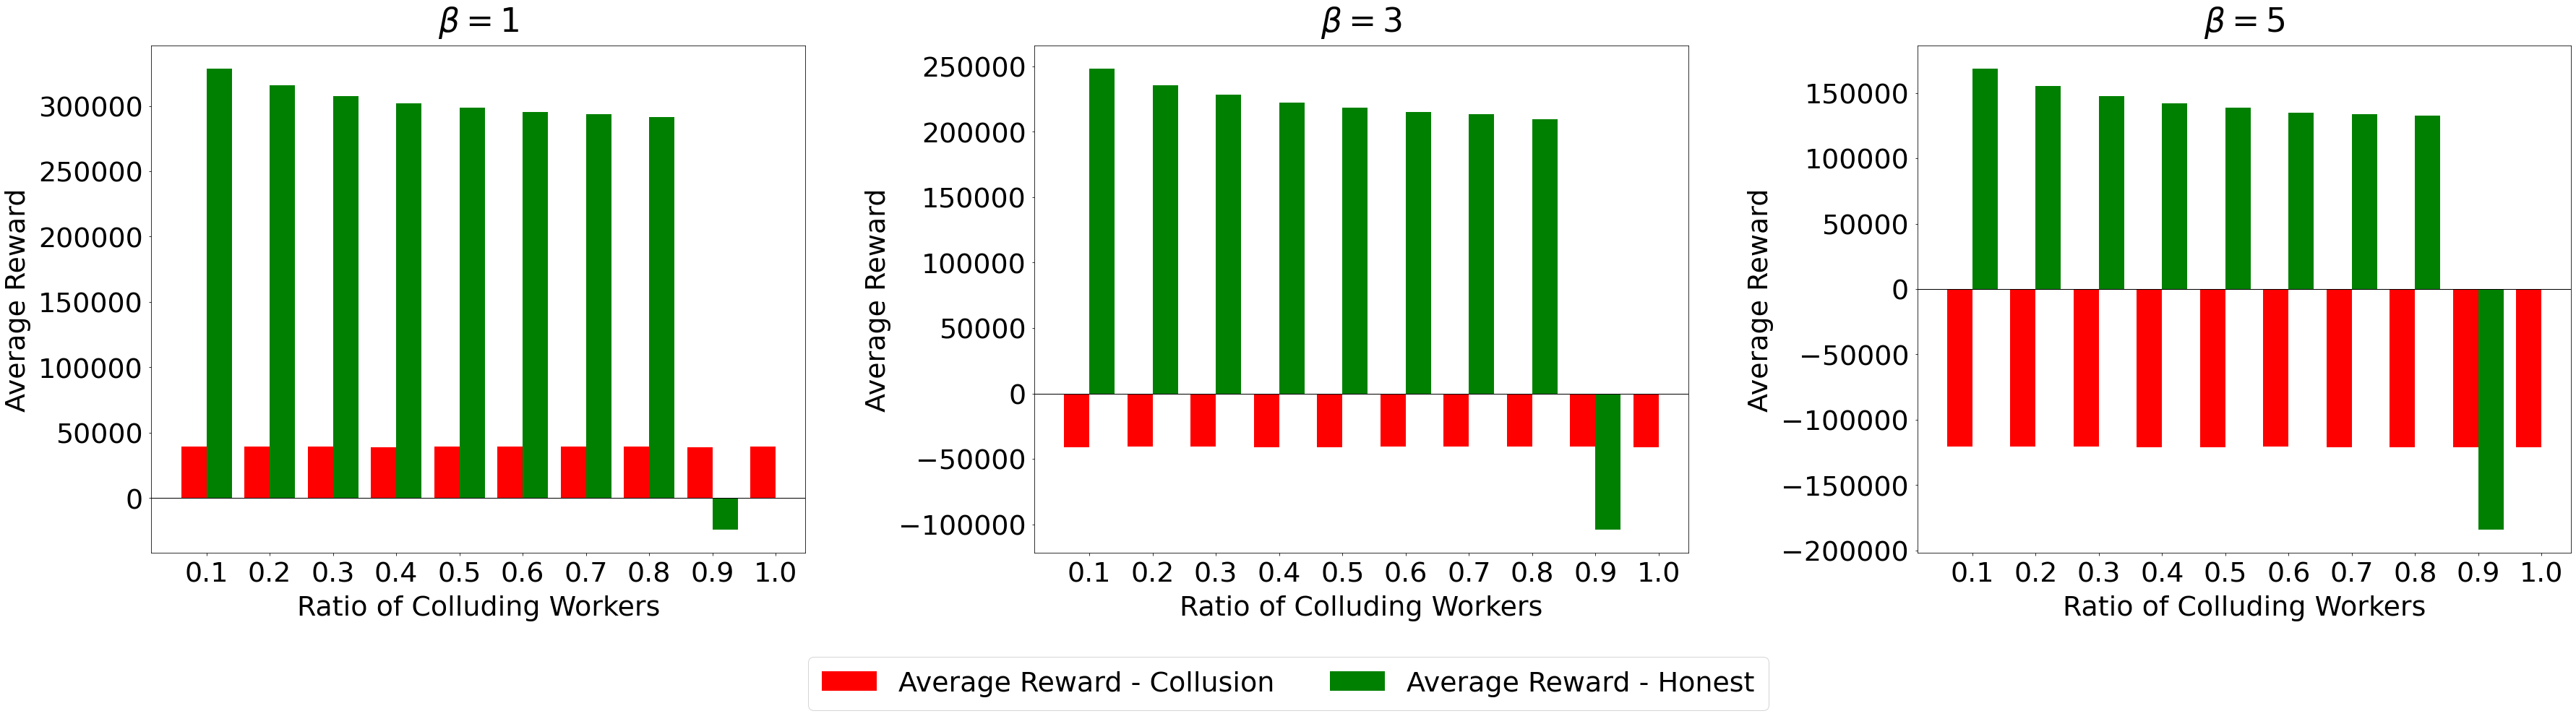

In [27]:
# Collect and prepare results, and plot them
collusion = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

i = 0
avg_reward = []
avg = []
for j, rs in enumerate(r5):
    rew = np.array(rs["reward_0"])[0]
    avg.append([np.mean(rew[:int(len(rew)*collusion[i])]), 
                np.mean(rew[int(len(rew)*collusion[i]):])
               ])
    i += 1
    # check if enough data has been collected
    if (j+1)%10 == 0:
        avg_reward.append(np.array(avg).T)
        i, avg = 0, []

# prepare the graph
fig, ax = plt.subplots(nrows=1, ncols= 3, figsize=(60, 15))
fig.subplots_adjust(wspace=0.35, bottom=0.23)
#fig.tight_layout(pad=6.0)

# plot all graphs
plot_collusion(fig, ax[0], avg_reward[0], "beta_1")
plot_collusion(fig, ax[1], avg_reward[1], "beta_3")
plot_collusion(fig, ax[2], avg_reward[2], "beta_5")

# create legends
#plt.figtext(0,1, "THIS IS THE FUCKING TEXT:", ha="left", va="top")
handles, labels = ax[2].get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, loc='lower center')

# save the figure
plt.savefig("exp-avg_reward_collusion.png")

# F) Average Reward on Heuristic vs Honest Participation

In [28]:
# npz files for collusion graph
r6 = []
for i in range(30):
    r6.append(np.load(path + "exp_heuristic/xp_{}.npz".format(i), allow_pickle=True))

In [29]:
def plot_heuristic(fig, ax, avg_, tag):
    
    # labels & legends
    xlabels = ["0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]
    exp_legends = ["Average Reward - Heuristic", "Average Reward - Honest"]

    # plot the graph
    xAxis = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

    ax.bar(xAxis-0.2, avg_[0], color=colors[1], width = 0.4, label=exp_legends[0])
    ax.bar(xAxis+0.2, avg_[1], color=colors[2], width = 0.4, label=exp_legends[1])

    # create infomatics of the graph
    ax.set_title(r"$\beta = {}$".format(tag[-1]))
    #ax.set_title(r"LeNet on EMNIST, $\beta = {}$".format(tag[-1])+r", $|X^{priv}| \approx 24K$, $|X^{pub}| = 40K$, $Epochs = 10$")
    ax.set_xlabel("Ratio of Heuristic Workers")
    ax.set_ylabel("Average Reward")

    # clear exisiting ticks
    ax.set_xticks(xAxis)
    ax.set_xticklabels(xlabels)

    # set spines and other lables
    ax.axhline(0, color="black", linewidth=1)
    #ax.spines["bottom"].set_position(("data", 0))

    # create legend
    #ax.legend(loc="upper right")

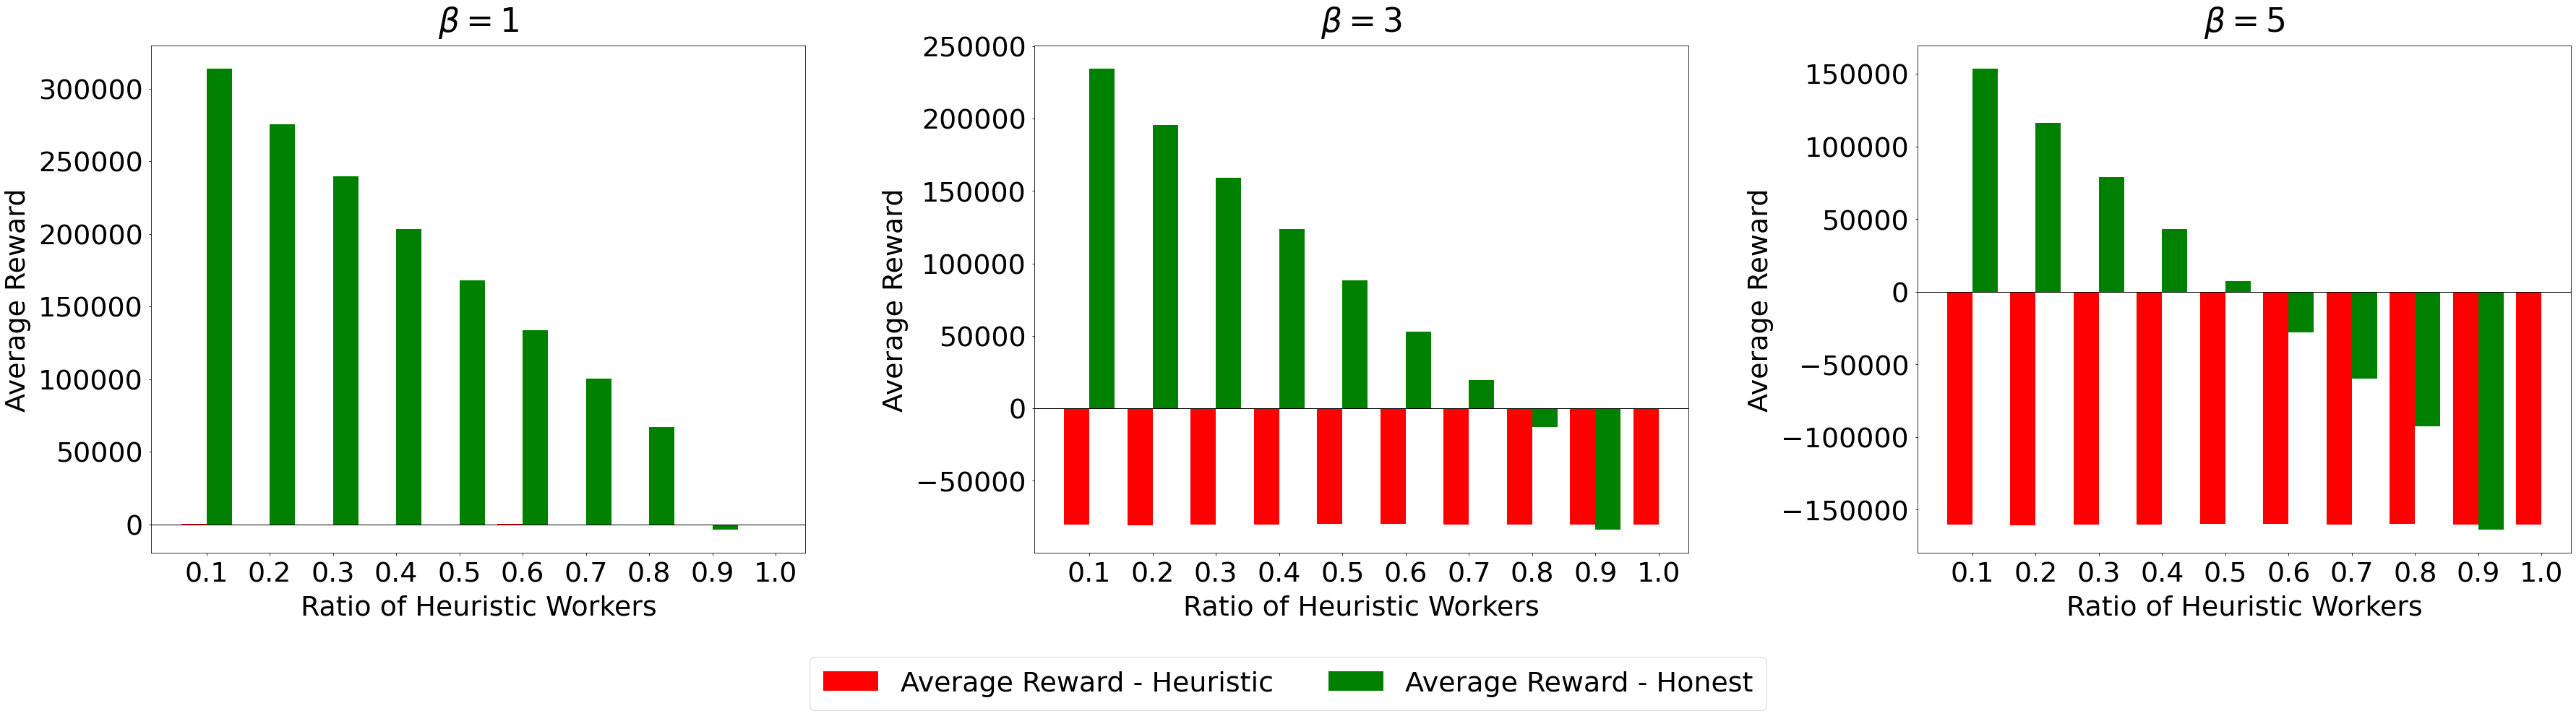

In [30]:
# Collect and prepare results, and plot them
Heuristic = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

i = 0
avg_reward_h = []
avg_h = []
for j, rs in enumerate(r6):
    rew = np.array(rs["reward_0"])[0]
    avg_h.append([np.mean(rew[:int(len(rew)*Heuristic[i])]), 
                  np.mean(rew[int(len(rew)*Heuristic[i]):])
                 ])
    i += 1
    # check if enough data has been collected
    if (j+1)%10 == 0:
        avg_reward_h.append(np.array(avg_h).T)
        i, avg_h = 0, []


# prepare the graph
fig, ax = plt.subplots(nrows=1, ncols= 3, figsize=(60, 15))
fig.subplots_adjust(wspace=0.35, bottom=0.23)
#fig.tight_layout(pad=6.0)

# plot all graphs
plot_heuristic(fig, ax[0], avg_reward_h[0], "beta_1")
plot_heuristic(fig, ax[1], avg_reward_h[1], "beta_3")
plot_heuristic(fig, ax[2], avg_reward_h[2], "beta_5")

# create legends
#plt.figtext(0,1, "THIS IS THE FUCKING TEXT:", ha="left", va="top")
handles, labels = ax[2].get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, loc='lower center')#, bbox_to_anchor=(0.5, 0))

# save the figure
plt.savefig("exp-avg_reward_heuristic.png")

# ALPHAS GRAPH

In [31]:
# change font size
font = {'family' : 'DejaVu Sans',
        'size'   : 14}
matplotlib.rc('font', **font)
rcParams['axes.titlepad'] = '10'
rcParams['axes.labelpad'] = '10'
rcParams['legend.borderpad'] = '0.5'
rcParams['xtick.major.pad']='8'
rcParams['ytick.major.pad']='8'

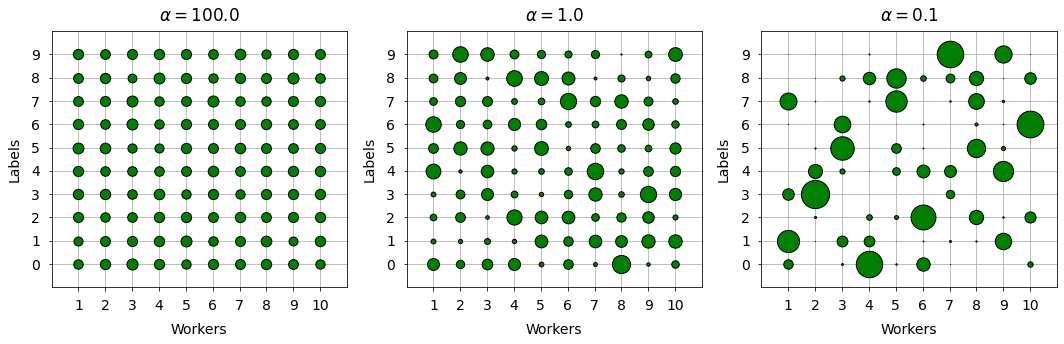

In [32]:
def make_double_stochstic(x):
    rsum = None
    csum = None

    n = 0 
    while n < 1000 and (np.any(rsum != 1) or np.any(csum != 1)):
        x /= x.sum(0)
        x = x / x.sum(1)[:, np.newaxis]
        rsum = x.sum(1)
        csum = x.sum(0)
        n += 1

    #x = x / x.sum(axis=0).reshape(1,-1)
    return x


alpha=0.1
n_clients=10
n_classes=10

label_distribution = np.random.dirichlet([alpha]*n_clients, n_classes)
label_distribution = make_double_stochstic(label_distribution)

plt.figure(figsize=(15,5))
for k, alpha in enumerate([100.0, 1.0, 0.1]):
    
    n_clients=10
    n_classes=10

    label_distribution = np.random.dirichlet([alpha]*n_clients, n_classes)
    label_distribution = make_double_stochstic(label_distribution)
    
    fig = plt.subplot(1,3,1+k)
    for i in range(10):
        for j in range(10):
            plt.scatter(j,i,s=label_distribution[i,j]*1000, color="green", zorder=5, ec="k") #"C0"

    plt.title(r"$\alpha={}$".format(alpha))
    plt.xticks(range(10), range(1,11))
    plt.yticks(range(10))
    plt.xlabel("Workers")
    plt.ylabel("Labels")
    plt.grid("major", zorder=4)
    plt.xlim(-1, 10)
    plt.ylim(-1, 10)

plt.tight_layout()
plt.savefig("alphas.png")
plt.show()